# Results Analysis for Hindi BabyLM

This notebook analyzes experimental results:
- Training curves comparison
- Evaluation metrics visualization  
- Statistical significance testing
- Model comparison
- Thesis figure generation

In [6]:
import sys
from pathlib import Path
import os

# Add project root to Python path for cluster
current = Path.cwd()
if current.name == 'workspace' or 'workspace' in str(current):
    project_root = current.parent / 'dss' / 'dsshome1' / '00' / 'ge95xod2' / 'Hindi-BabyLM-Data-Efficient-Language-Modeling-for-Hindi'
else:
    project_root = current.parent if current.name == 'notebooks' else current

sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project imports
from src.analysis.results_analyzer import ResultsAnalyzer, analyze_experiments
from src.analysis.visualization_utils import ThesisPlotter

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Imports successful!")

✅ Imports successful!


## 1. Load Experimental Results

In [10]:
# Initialize results analyzer
analyzer = analyze_experiments(results_dir=os.path.join(project_root,'results'))

print(f"Loaded {len(analyzer.experiments)} experiments:")
for exp_name in analyzer.experiments.keys():
    print(f"  - {exp_name}")

Loaded 2 experiments:
  - 5354107_complete_pipeline
  - 5354274_complete_pipeline


## 2. Training Curves Comparison

/dss/dsshome1/00/ge95xod2/Hindi-BabyLM-Data-Efficient-Language-Modeling-for-Hindi/src/analysis/results_analyzer.py:196: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/dss/dsshome1/00/ge95xod2/Hindi-BabyLM-Data-Efficient-Language-Modeling-for-Hindi/src/analysis/results_analyzer.py:196: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


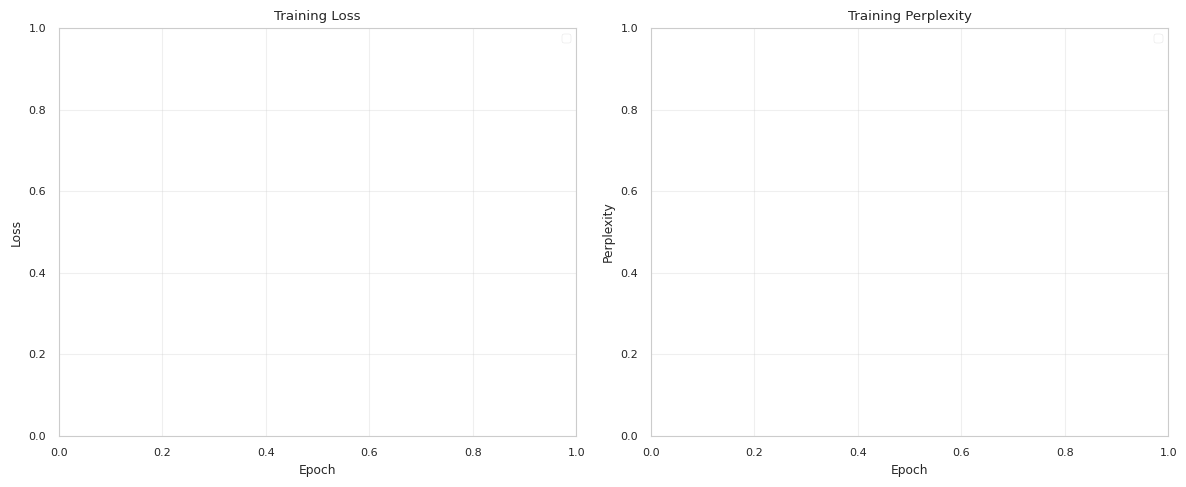

✅ Training curves saved


In [11]:
# Plot training curves for all experiments
fig = analyzer.plot_training_curves(
    metrics=['loss', 'perplexity'],
    save_path=os.path.join(project_root,'figures/training_curves.png')
)

plt.show()
print("✅ Training curves saved")

## 3. IndicGLUE Evaluation Comparison

In [12]:
# Compare IndicGLUE performance
fig = analyzer.plot_evaluation_comparison(
    eval_type='indicglue',
    save_path=os.path.join(project_root,'figures/indicglue_comparison.png')
)

plt.show()
print("✅ IndicGLUE comparison saved")

No indicglue results found


<Figure size 1200x600 with 0 Axes>

✅ IndicGLUE comparison saved


## 4. MultiBLiMP Syntactic Evaluation

In [13]:
# Compare MultiBLiMP performance
fig = analyzer.plot_evaluation_comparison(
    eval_type='multiblimp',
    save_path=os.path.join(project_root,'figures/multiblimp_comparison.png')
)

plt.show()
print("✅ MultiBLiMP comparison saved")

No multiblimp results found


<Figure size 1200x600 with 0 Axes>

✅ MultiBLiMP comparison saved


## 5. Morphological Probes Analysis

In [14]:
# Compare morphological probe performance
fig = analyzer.plot_evaluation_comparison(
    eval_type='probes',
    save_path=os.path.join(project_root,'figures/morphological_probes_comparison.png')
)

plt.show()
print("✅ Morphological probes comparison saved")

No probes results found


<Figure size 1200x600 with 0 Axes>

✅ Morphological probes comparison saved


## 6. Statistical Significance Testing

In [15]:
# Compare two best models statistically
experiments = list(analyzer.experiments.keys())

if len(experiments) >= 2:
    exp1, exp2 = experiments[0], experiments[1]
    
    print(f"Comparing: {exp1} vs {exp2}\n")
    
    # Statistical comparison
    comparison = analyzer.compare_models_statistically(
        exp1, exp2,
        metric='accuracy',
        eval_type='indicglue'
    )
    
    print("📊 Statistical Comparison:")
    print(f"\nSummary Statistics:")
    print(f"  {exp1} mean: {comparison['summary']['exp1_mean']:.4f} ± {comparison['summary']['exp1_std']:.4f}")
    print(f"  {exp2} mean: {comparison['summary']['exp2_mean']:.4f} ± {comparison['summary']['exp2_std']:.4f}")
    print(f"  Difference: {comparison['summary']['difference']:.4f}")
    
    print(f"\nPaired t-test:")
    print(f"  p-value: {comparison['t_test']['p_value']:.4f}")
    print(f"  Significant: {'Yes ✓' if comparison['t_test']['significant'] else 'No ✗'}")
    
    print(f"\nWilcoxon test:")
    print(f"  p-value: {comparison['wilcoxon']['p_value']:.4f}")
    print(f"  Significant: {'Yes ✓' if comparison['wilcoxon']['significant'] else 'No ✗'}")
    
    print(f"\nEffect Size:")
    print(f"  Cohen's d: {comparison['effect_size']['cohens_d']:.4f}")
    print(f"  Interpretation: {comparison['effect_size']['interpretation']}")
    
    print(f"\nBootstrap 95% CI:")
    print(f"  [{comparison['bootstrap_ci']['lower']:.4f}, {comparison['bootstrap_ci']['upper']:.4f}]")
else:
    print("Need at least 2 experiments for comparison")

Comparing: 5354107_complete_pipeline vs 5354274_complete_pipeline

📊 Statistical Comparison:

Summary Statistics:


KeyError: 'summary'

## 7. Generate LaTeX Tables for Thesis

In [ ]:
# Generate LaTeX table for IndicGLUE
latex_table = analyzer.generate_latex_table(
    eval_type='indicglue',
    metric='accuracy',
    caption='IndicGLUE Benchmark Results',
    label='tab:indicglue_results',
    save_path=os.path.join(project_root,'tables/indicglue_results.tex')
)

print("IndicGLUE LaTeX Table:")
print(latex_table)
print("\n✅ LaTeX table saved to tables/indicglue_results.tex")

In [ ]:
# Generate LaTeX table for MultiBLiMP
latex_table = analyzer.generate_latex_table(
    eval_type='multiblimp',
    metric='accuracy',
    caption='MultiBLiMP Syntactic Phenomena Results',
    label='tab:multiblimp_results',
    save_path=os.path.join(project_root,'tables/multiblimp_results.tex')
)

print("✅ MultiBLiMP LaTeX table saved")

## 8. Layer-wise Probe Visualization

In [ ]:
# Visualize layer-wise probe results
plotter = ThesisPlotter(style='thesis')

# Example: Case detection probe
# (Replace with actual data from your experiments)
layer_results = {i: 0.5 + 0.03 * i + np.random.normal(0, 0.02) 
                for i in range(13)}

fig = plotter.plot_layer_wise_probe_results(
    layer_results,
    probe_name='Case Detection',
    title='Layer-wise Case Detection Accuracy',
    save_path=os.path.join(project_root,'figures/layer_wise_case_probe.png')
)

plt.show()
print("✅ Layer-wise probe visualization saved")

## 9. Model Size vs Performance

In [ ]:
# Plot performance vs model size
# (Replace with actual data)
model_sizes = [50, 110, 350]  # Millions of parameters
accuracies = [0.72, 0.78, 0.82]
model_names = ['Tiny', 'Small', 'Medium']

fig = plotter.plot_performance_vs_model_size(
    model_sizes,
    accuracies,
    model_names,
    title='Model Size vs IndicGLUE Performance',
    save_path=os.path.join(project_root,'figures/model_size_vs_performance.png')
)

plt.show()
print("✅ Model size comparison saved")

## 10. Generate Individual Experiment Reports

In [ ]:
# Generate reports for each experiment
for exp_name in analyzer.experiments.keys():
    report = analyzer.generate_summary_report(
        exp_name,
        save_path=f'../reports/{exp_name}_report.md'
    )
    print(f"✅ Generated report for {exp_name}")

print("\nAll reports saved to reports/ directory")

## Summary

This notebook analyzed:
- ✅ Training curves and convergence
- ✅ Evaluation metrics across benchmarks
- ✅ Statistical significance of differences
- ✅ LaTeX tables for thesis
- ✅ Layer-wise probing analysis
- ✅ Model size comparisons

All figures and tables ready for thesis inclusion!